<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/01_Basics/08_Revision_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Combine NumPy & Pandas — Generate and Load Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create a sample dataset using NumPy
np.random.seed(42)
student_ids = np.arange(1, 11)
names = ["Krish", "Rohit", "Gaurav", "Arjun", "Raj", "Karan", "Simran", "Priya", "Ravi", "Amit"]
math_scores = np.random.randint(60, 100, 10)
science_scores = np.random.randint(55, 95, 10)
english_scores = np.random.randint(65, 100, 10)

In [3]:
# Combine into DataFrame
df = pd.DataFrame({
    "Student_ID": student_ids,
    "Name": names,
    "Math": math_scores,
    "Science": science_scores,
    "English": english_scores
})

In [4]:
print("Original Dataset:")
print(df)

Original Dataset:
   Student_ID    Name  Math  Science  English
0           1   Krish    98       78       66
1           2   Rohit    88       90       85
2           3  Gaurav    74       94       97
3           4   Arjun    67       78       76
4           5     Raj    80       57       86
5           6   Karan    98       76       89
6           7  Simran    78       56       91
7           8   Priya    82       78       92
8           9    Ravi    70       84       80
9          10    Amit    70       92       79


In [5]:
df.to_csv("student_scores.csv", index=False)

# 2. Clean and Filter Data

In [6]:
# Load CSV back
data = pd.read_csv("student_scores.csv")

In [8]:
print("Loaded Data:")
print(data.head())

Loaded Data:
   Student_ID    Name  Math  Science  English
0           1   Krish    98       78       66
1           2   Rohit    88       90       85
2           3  Gaurav    74       94       97
3           4   Arjun    67       78       76
4           5     Raj    80       57       86


In [9]:
# Introduce some missing values (for practice)
data.loc[2, "Science"] = np.nan
data.loc[7, "Math"] = np.nan

In [11]:
print("With Missing Values:")
print(data)

With Missing Values:
   Student_ID    Name  Math  Science  English
0           1   Krish  98.0     78.0       66
1           2   Rohit  88.0     90.0       85
2           3  Gaurav  74.0      NaN       97
3           4   Arjun  67.0     78.0       76
4           5     Raj  80.0     57.0       86
5           6   Karan  98.0     76.0       89
6           7  Simran  78.0     56.0       91
7           8   Priya   NaN     78.0       92
8           9    Ravi  70.0     84.0       80
9          10    Amit  70.0     92.0       79


In [12]:
# Fill missing values with mean
data["Math"].fillna(data["Math"].mean(), inplace=True)
data["Science"].fillna(data["Science"].mean(), inplace=True)

/tmp/ipython-input-4227197211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Math"].fillna(data["Math"].mean(), inplace=True)
/tmp/ipython-input-4227197211.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [13]:
# Verify cleaning
print("After Cleaning Missing Values:")
print(data)

After Cleaning Missing Values:
   Student_ID    Name       Math    Science  English
0           1   Krish  98.000000  78.000000       66
1           2   Rohit  88.000000  90.000000       85
2           3  Gaurav  74.000000  76.555556       97
3           4   Arjun  67.000000  78.000000       76
4           5     Raj  80.000000  57.000000       86
5           6   Karan  98.000000  76.000000       89
6           7  Simran  78.000000  56.000000       91
7           8   Priya  80.333333  78.000000       92
8           9    Ravi  70.000000  84.000000       80
9          10    Amit  70.000000  92.000000       79


# 3. Analyze & Filter

In [14]:
# Basic statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       Student_ID       Math    Science    English
count    10.00000  10.000000  10.000000  10.000000
mean      5.50000  80.333333  76.555556  84.100000
std       3.02765  11.155467  11.954647   9.073159
min       1.00000  67.000000  56.000000  66.000000
25%       3.25000  71.000000  76.138889  79.250000
50%       5.50000  79.000000  78.000000  85.500000
75%       7.75000  86.083333  82.500000  90.500000
max      10.00000  98.000000  92.000000  97.000000


In [15]:
# Highest overall scorer
data["Total"] = data["Math"] + data["Science"] + data["English"]
top_student = data.loc[data["Total"].idxmax()]

In [16]:
print(f"Top Scorer: {top_student['Name']} with {top_student['Total']} marks")

Top Scorer: Rohit with 263.0 marks


In [17]:
# Filter: Students scoring above 80 in Math
high_math = data[data["Math"] > 80]
print("Students Scoring Above 80 in Math:")
print(high_math[["Name", "Math"]])

Students Scoring Above 80 in Math:
    Name       Math
0  Krish  98.000000
1  Rohit  88.000000
5  Karan  98.000000
7  Priya  80.333333


# 4. Visualization 1 — Subject-Wise Comparison

<Figure size 800x500 with 0 Axes>

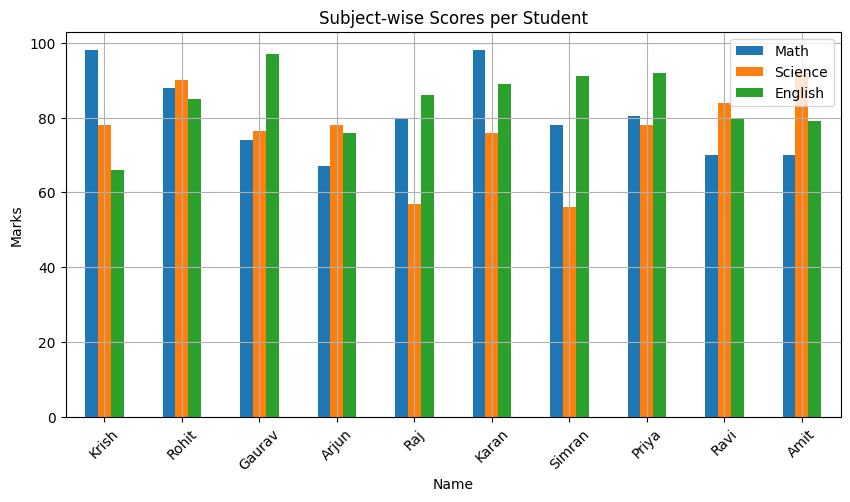

In [18]:
plt.figure(figsize=(8,5))
data.plot(x="Name", y=["Math", "Science", "English"], kind="bar", figsize=(10,5))
plt.title("Subject-wise Scores per Student")
plt.ylabel("Marks")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Visualization 2 — Distribution of Total Scores

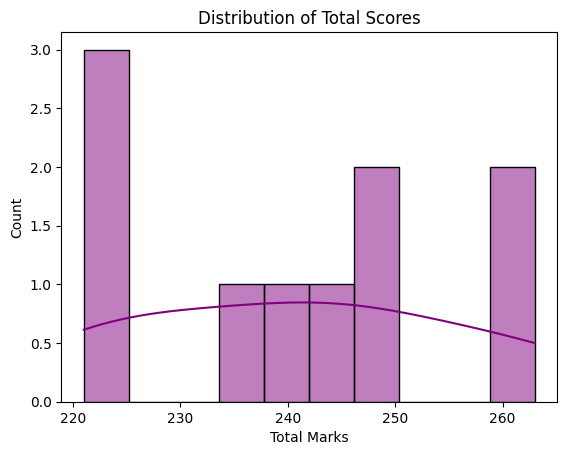

In [19]:
sns.histplot(data["Total"], bins=10, kde=True, color="purple")
plt.title("Distribution of Total Scores")
plt.xlabel("Total Marks")
plt.show()

# 6. Correlation Heatmap

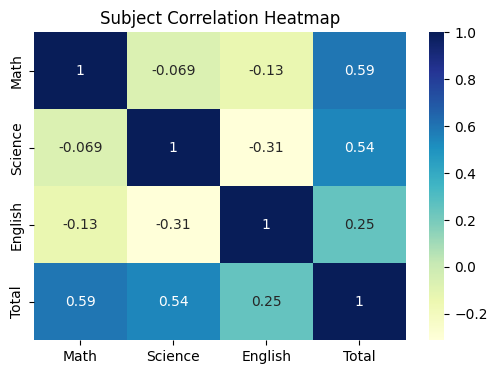

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(data[["Math","Science","English","Total"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Subject Correlation Heatmap")
plt.show()

# 7. Mini Challenge — Sales Analysis Script

In [21]:
# Create fake sales dataset
np.random.seed(10)
sales = pd.DataFrame({
    "Month": ["Jan","Feb","Mar","Apr","May","Jun"],
    "Product_A": np.random.randint(200, 500, 6),
    "Product_B": np.random.randint(150, 450, 6),
    "Product_C": np.random.randint(100, 400, 6)
})

In [22]:
print("Monthly Sales Data:")
print(sales)

Monthly Sales Data:
  Month  Product_A  Product_B  Product_C
0   Jan        465        158        154
1   Feb        325        223        222
2   Mar        215        406        162
3   Apr        323        190        133
4   May        356        166        300
5   Jun        421        389        277


In [23]:
# Add Total Sales column
sales["Total_Sales"] = sales[["Product_A", "Product_B", "Product_C"]].sum(axis=1)

In [24]:
# Sort by Total Sales
sales_sorted = sales.sort_values("Total_Sales", ascending=False)

In [25]:
print("Sorted by Total Sales:")
print(sales_sorted)

Sorted by Total Sales:
  Month  Product_A  Product_B  Product_C  Total_Sales
5   Jun        421        389        277         1087
4   May        356        166        300          822
2   Mar        215        406        162          783
0   Jan        465        158        154          777
1   Feb        325        223        222          770
3   Apr        323        190        133          646


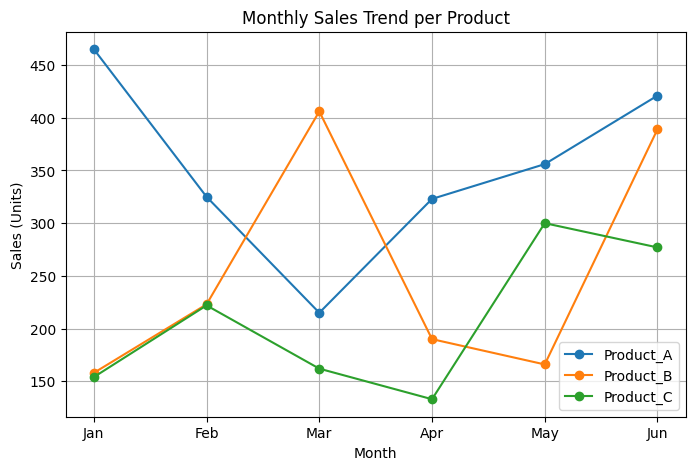

In [26]:
# Plot
sales.plot(x="Month", y=["Product_A","Product_B","Product_C"], kind="line", marker='o', figsize=(8,5))
plt.title("Monthly Sales Trend per Product")
plt.ylabel("Sales (Units)")
plt.grid(True)
plt.show()

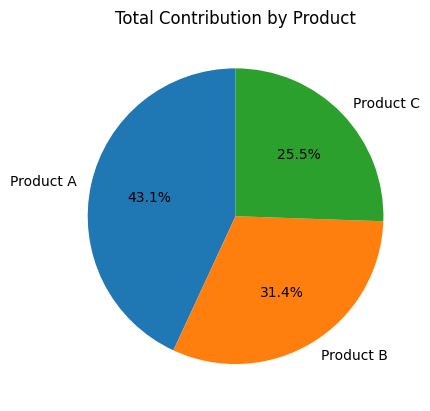

In [28]:
# Pie chart for total product contribution
total_by_product = [sales["Product_A"].sum(), sales["Product_B"].sum(), sales["Product_C"].sum()]
labels = ["Product A", "Product B", "Product C"]

plt.pie(total_by_product, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Total Contribution by Product")
plt.show()